In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


In [56]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

<div style= 'text-align:center ; font-size:20px'>
Loading the Dataset
</div>

In [42]:
df = pd.read_csv(r'/kaggle/input/healthcare-dataset/healthcare_dataset.csv')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


<div style= 'text-align:center ; font-size:20px'>
Summary Statistics of Dataset
</div>

In [43]:
df.describe()


,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

<div style= 'text-align:center ; font-size:20px'>
We see that the columns are assigned object datatype which utilizes extra memory hence changing the datatypes to string datatype and datetime datatype respectively
</div>

In [45]:
df1 = df.memory_usage(deep=True)

In [46]:
df['Date of Admission'] = df['Date of Admission'].astype('datetime64[ns]')
df['Discharge Date'] = df['Discharge Date'].astype('datetime64[ns]')
df['Name'] = df['Name'].astype('string')
df['Gender'] = df['Gender'].astype('string')
df['Blood Type'] = df['Blood Type'].astype('string')
df['Medical Condition'] = df['Medical Condition'].astype('string')
df['Doctor'] = df['Doctor'].astype('string')
df['Hospital'] = df['Hospital'].astype('string')
df['Insurance Provider'] = df['Insurance Provider'].astype('string')
df['Admission Type'] = df['Admission Type'].astype('string')
df['Medication'] = df['Medication'].astype('string')
df['Test Results'] = df['Test Results'].astype('string')


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  string        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  string        
 3   Blood Type          55500 non-null  string        
 4   Medical Condition   55500 non-null  string        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  string        
 7   Hospital            55500 non-null  string        
 8   Insurance Provider  55500 non-null  string        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  string        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  string    

In [48]:
df2 = df.memory_usage(deep=True)

<div style= 'text-align:center ; font-size:20px'>
We can see a reduction in the total memory usage by assigning proper datatype
</div>

In [49]:
memory_usage = {
    'df (before)':df1.sum(),
    'df (after)':df2.sum()
}

memory_df = pd.DataFrame(memory_usage,index=['Memory Usage (Bytes)'])
memory_df

,df (before),df (after)
Memory Usage (Bytes),45525051,38976051


<div style='text-align:center; font-size:20px'>
Gender counts 
</div>

In [50]:
gender_counts = df['Gender'].value_counts().reset_index(name='Count of Individuals')
gender_counts

,Gender,Count of Individuals
0,Male,27774
1,Female,27726


In [51]:
gender_counts_plot = px.pie(gender_counts, values='Count of Individuals', names='Gender',title="Gender Count Distribution")

gender_counts_plot.show()

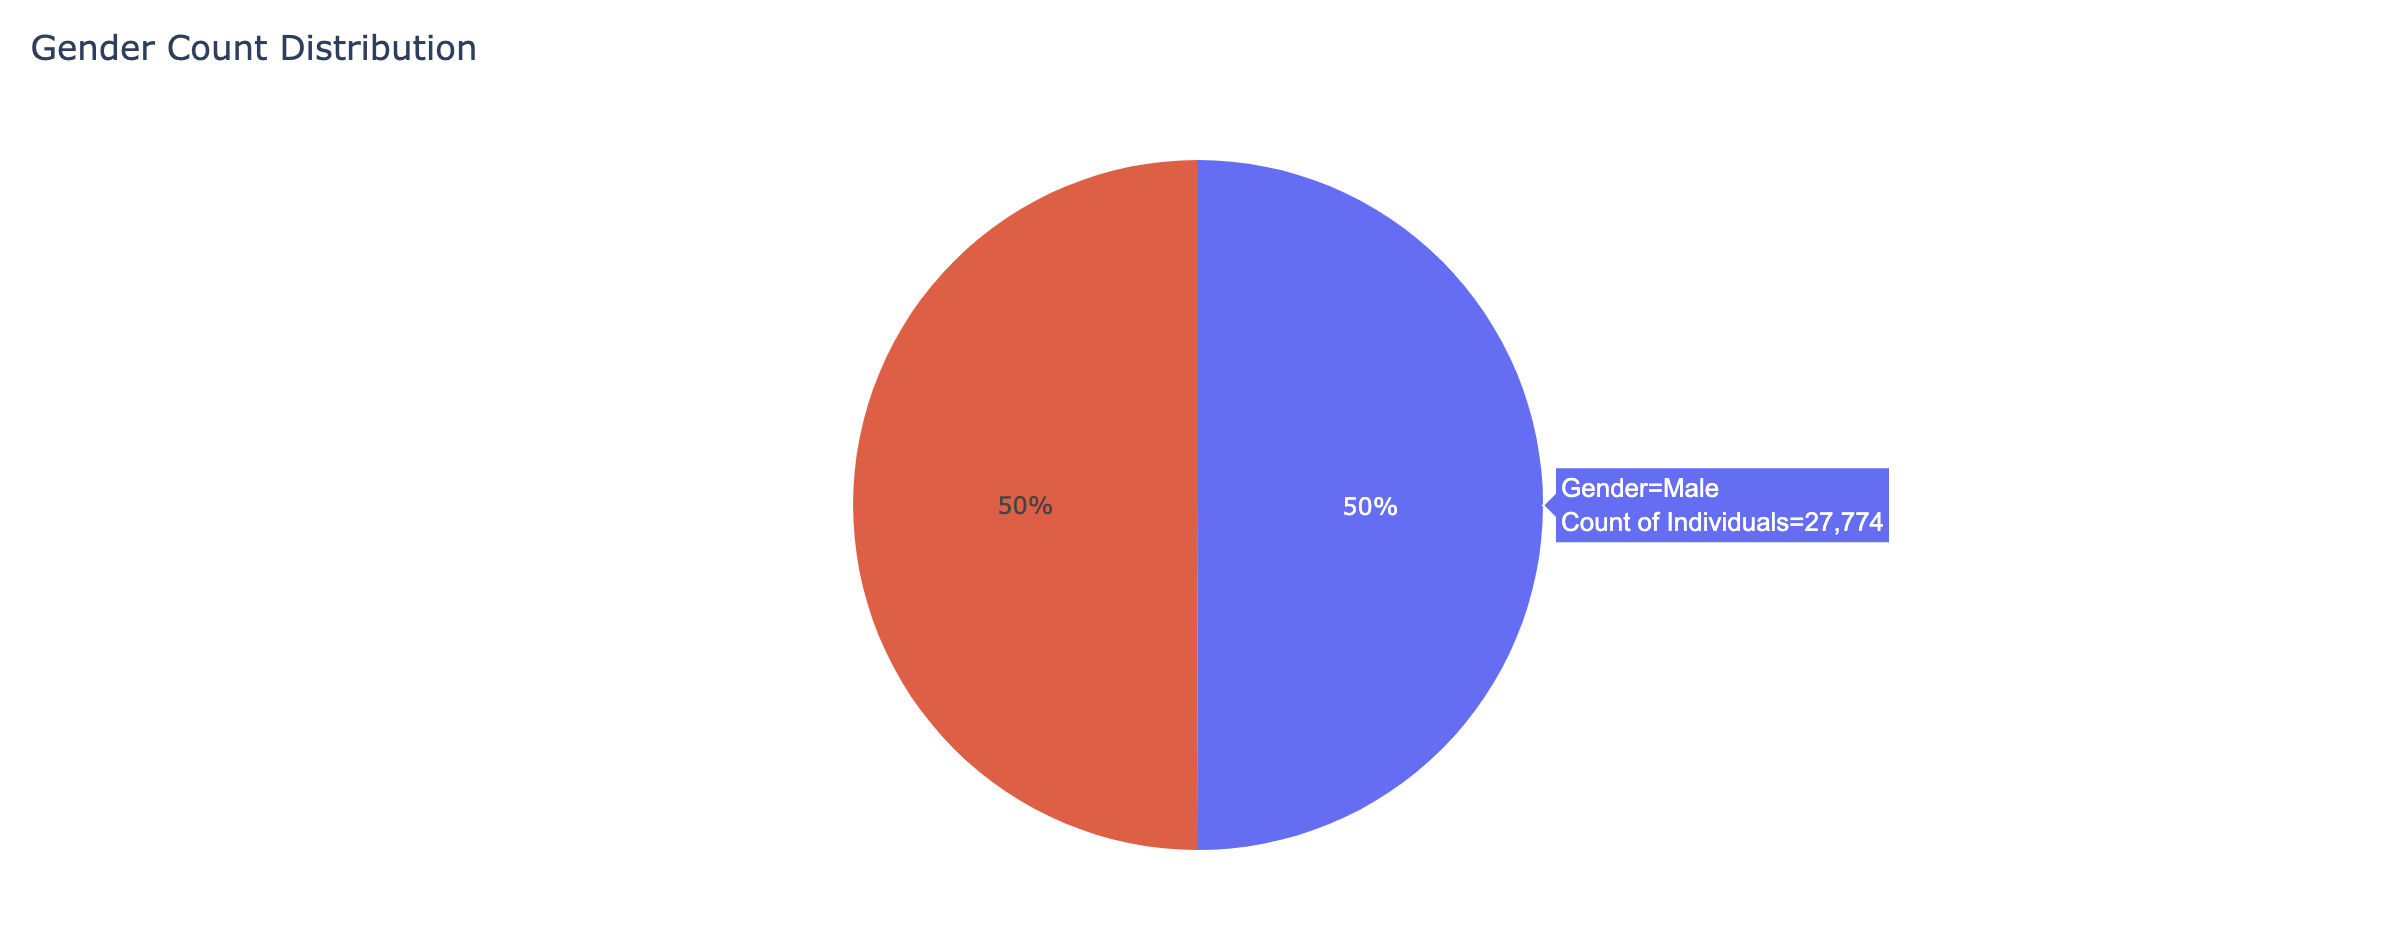

In [57]:
from PIL import Image
from IPython.display import display

image_path = '/kaggle/input/this-project-viz/s1.png'

img = Image.open(image_path)
display(img)


<div style='text-align:center;font-size:20px'>
    Blood Type vs Medical Condition
</div>

In [58]:
blood_med_cond = df.groupby(['Blood Type','Medical Condition']).size().reset_index(name='Count of Individuals')\
                 .sort_values(by=['Count of Individuals'], ascending=False).reset_index(drop=True)
blood_med_cond

,Blood Type,Medical Condition,Count of Individuals
0,AB+,Hypertension,1215
1,A+,Diabetes,1213
2,B+,Arthritis,1201
3,A-,Hypertension,1199
4,AB-,Cancer,1198
5,O+,Arthritis,1198
6,B+,Cancer,1196
7,AB-,Arthritis,1192
8,AB+,Asthma,1189
9,B+,Diabetes,1188


In [22]:
blood_med_cond_plot = px.histogram(blood_med_cond,x='Blood Type',y='Count of Individuals',color='Medical Condition', width=900,title="Distribution of Individuals by Blood Type and Medical Condition")
blood_med_cond_plot.update_layout(
    title="Distribution of Individuals by Blood Type and Medical Condition"
)
blood_med_cond_plot.show()

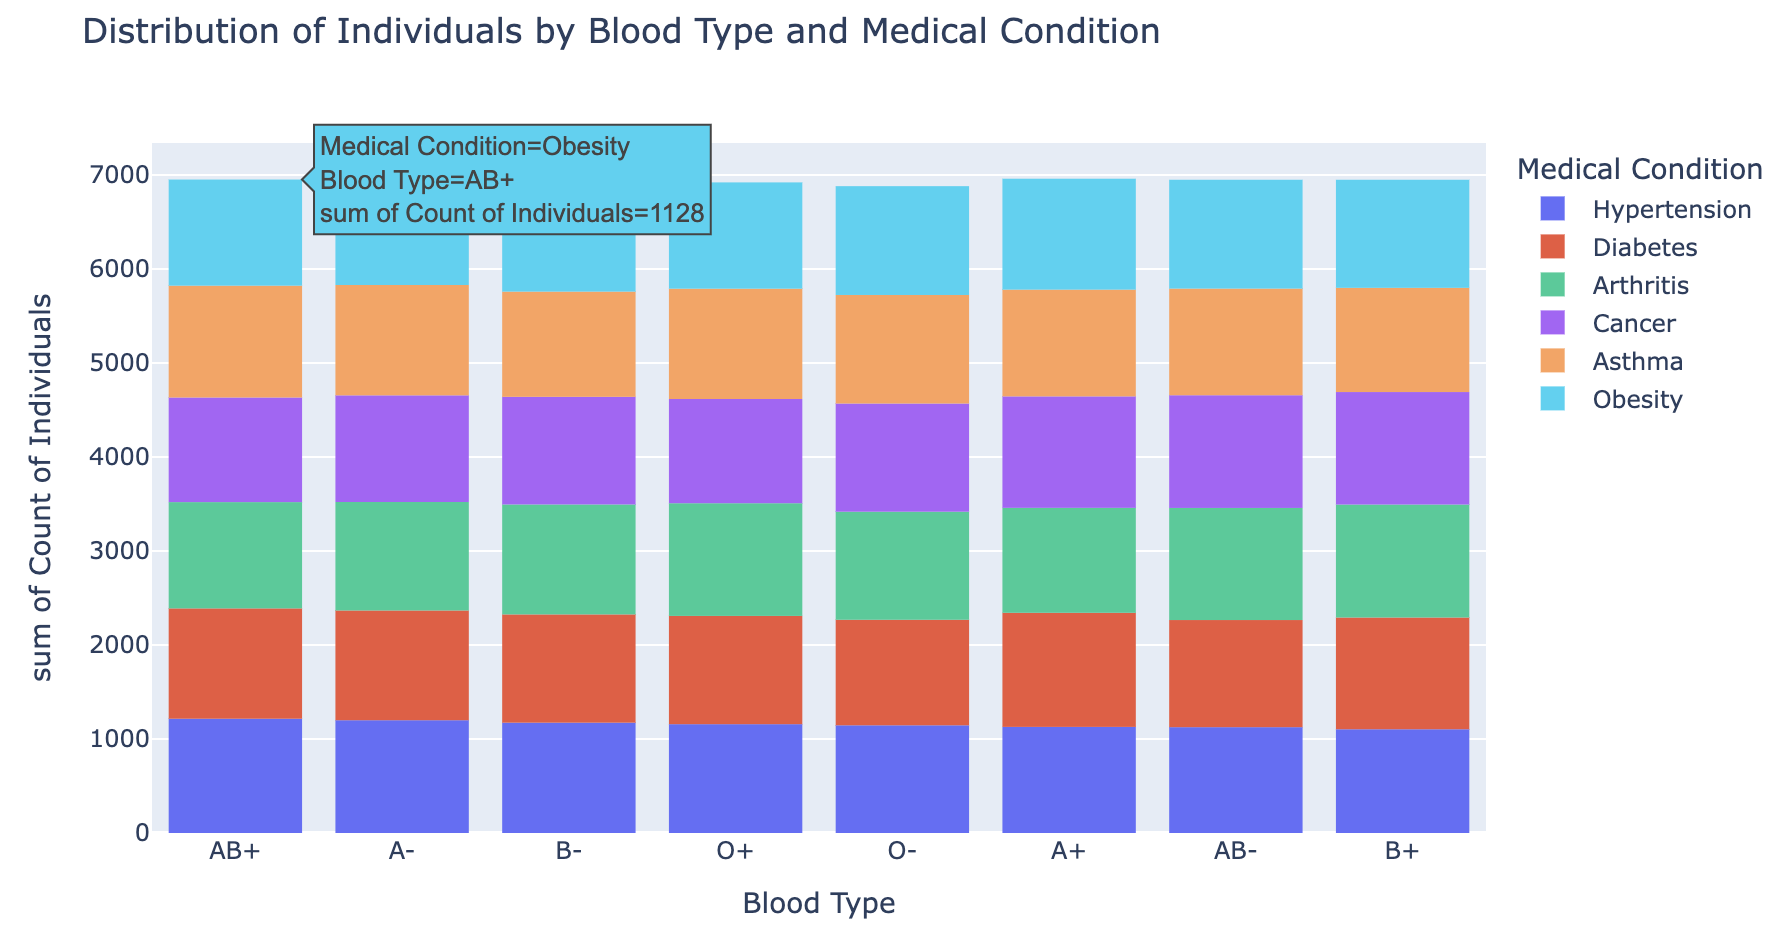

In [59]:
from PIL import Image
from IPython.display import display

image_path = '/kaggle/input/this-project-viz/s2.png'

img = Image.open(image_path)
display(img)

<div style=' text-align:center;font-size:20px'>
   Medical Condition vs Count of Individuals
</div>

In [60]:
med_date = df.groupby(['Date of Admission','Medical Condition']).size().reset_index(name='Count of Individuals')\
                 .sort_values(by=['Count of Individuals'], ascending=False).reset_index(drop=True)
med_date

,Date of Admission,Medical Condition,Count of Individuals
0,2020-10-22,Hypertension,17
1,2019-07-29,Asthma,16
2,2023-08-13,Hypertension,16
3,2022-05-25,Hypertension,16
4,2023-04-18,Diabetes,16
...,...,...,...
10839,2023-10-13,Arthritis,1
10840,2023-10-14,Arthritis,1
10841,2021-02-25,Diabetes,1
10842,2021-02-23,Arthritis,1


<div style=' text-align:center;font-size:20px'>
   Medical Condition vs Total Count of Individuals
</div>

In [61]:
med_admits = df.loc[:,['Medical Condition','Date of Admission', 'Discharge Date']]
med_admits = med_admits.groupby('Medical Condition').size().reset_index(name='Count of Individuals').sort_values(by='Count of Individuals',ascending=False).reset_index(drop=True)
med_admits

,Medical Condition,Count of Individuals
0,Arthritis,9308
1,Diabetes,9304
2,Hypertension,9245
3,Obesity,9231
4,Cancer,9227
5,Asthma,9185


In [62]:
fig = go.Figure(data=[go.Bar(
    x=med_admits['Medical Condition'],
    y=med_admits['Count of Individuals'],
    marker_color=['#c90425'] + ['#bfa3aa'] * (len(med_admits) - 1)
)])

fig.update_layout(
    yaxis=dict(range=[9000, 9500]),
    title="Medical Condition vs Total Count of Individuals",
    xaxis_title="Medical Condition",
    yaxis_title="Total Count of Individuals"
)

fig.show()


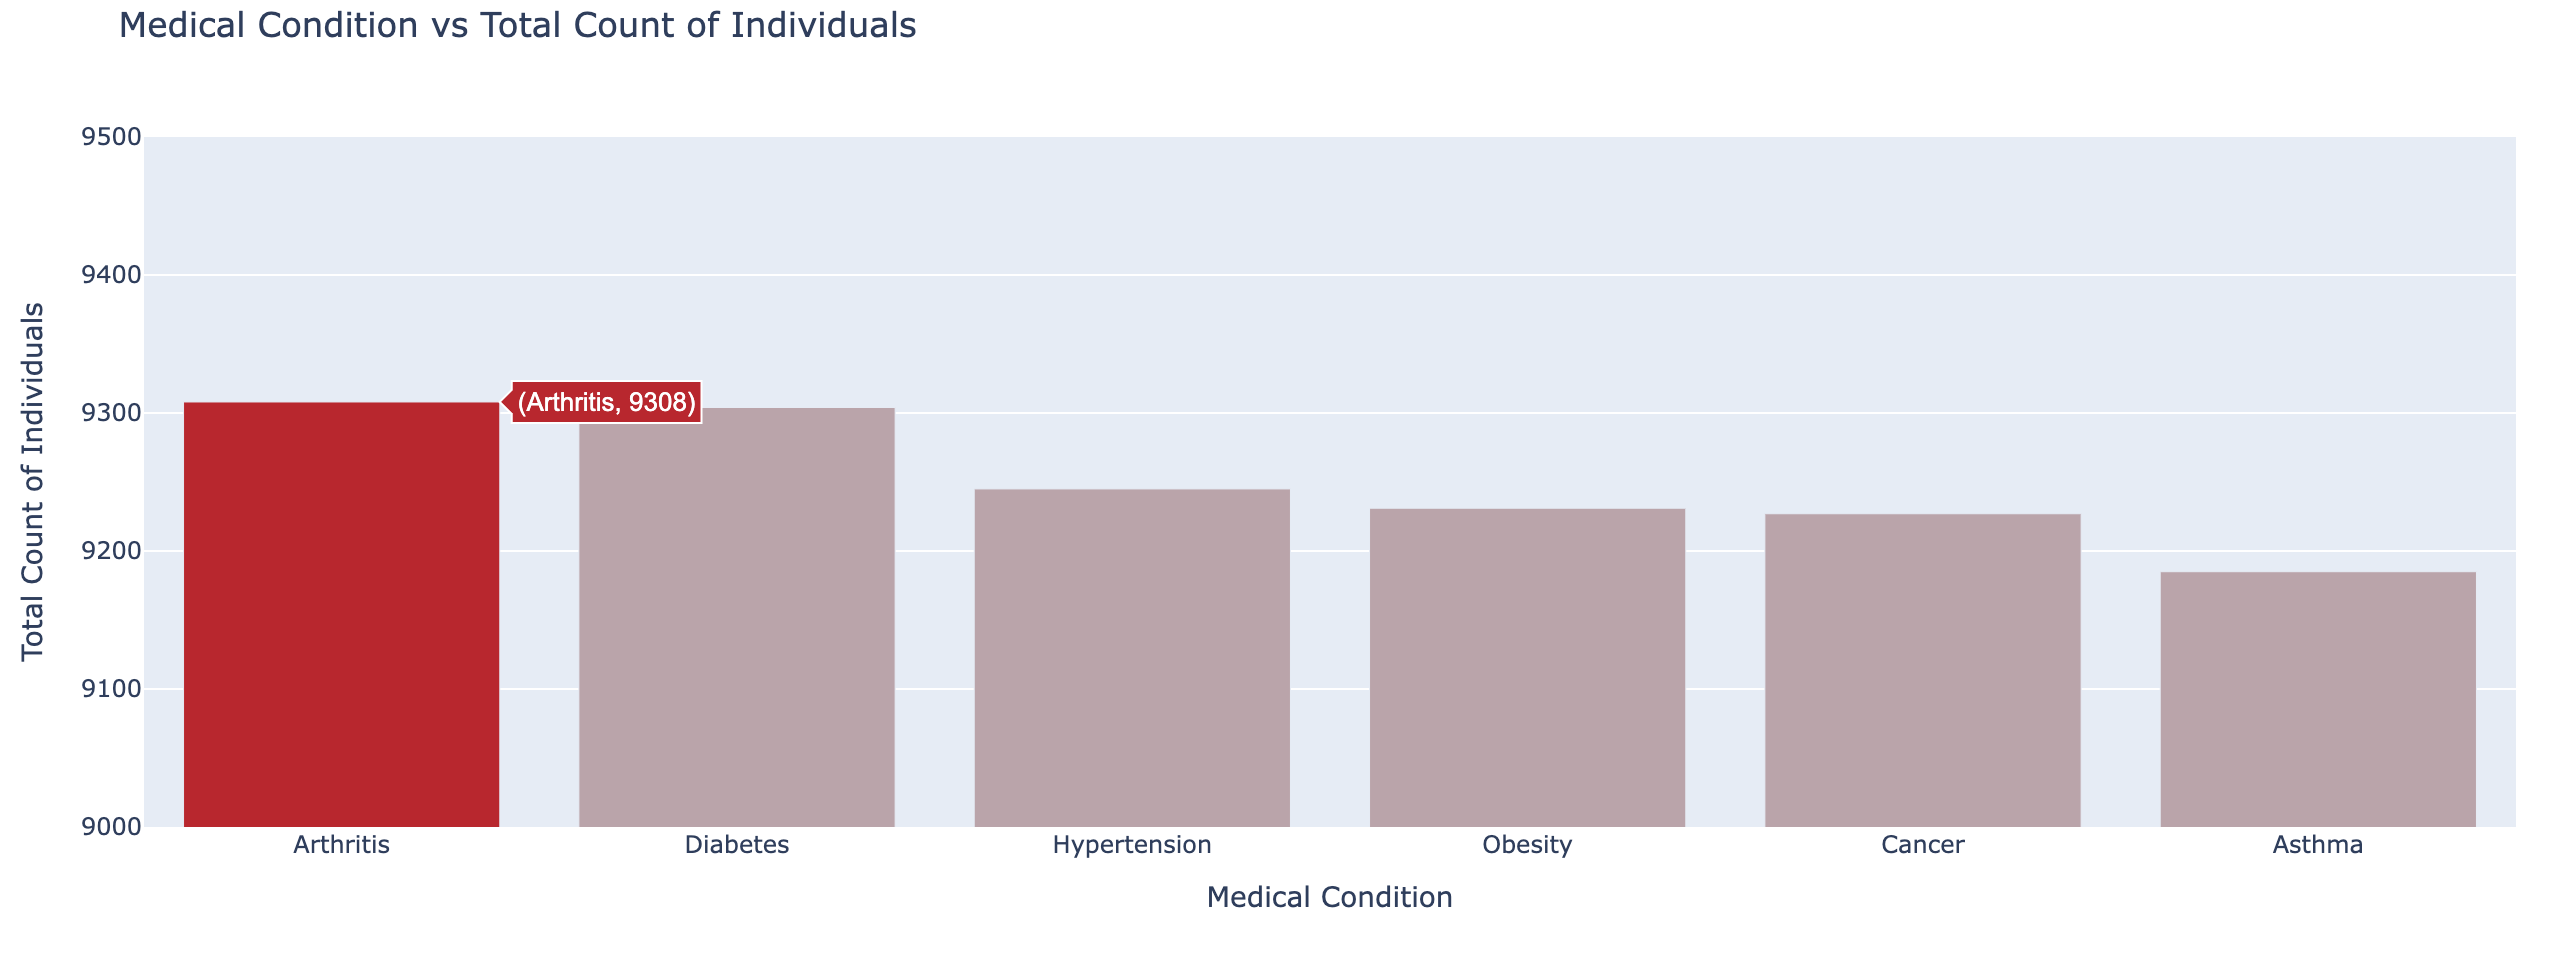

In [63]:
from PIL import Image
from IPython.display import display

image_path = '/kaggle/input/this-project-viz/s3.png'

img = Image.open(image_path)
display(img)

<div style='text-align:center;font-size:20px'>
 Medical Condition vs Maximum Admitted Individuals
</div>

In [64]:
med_admits = df.loc[:, ['Medical Condition', 'Date of Admission', 'Discharge Date']].copy()
med_admits['Admitted Days'] = (med_admits['Discharge Date'] - med_admits['Date of Admission']).dt.days


max_med_admits = med_admits.groupby('Medical Condition')['Admitted Days'].max().reset_index()
max_med_admits.rename(columns={'Admitted Days': 'Max Admitted Days'}, inplace=True)

med_admits_merge = pd.merge(med_admits, max_med_admits, on='Medical Condition')

filtered_med_admits = med_admits_merge.loc[med_admits_merge['Admitted Days']==med_admits_merge['Max Admitted Days']][['Medical Condition']]

count_fma = filtered_med_admits.groupby(['Medical Condition']).size().reset_index(name='Count of Individuals')\
            .sort_values(by='Count of Individuals',ascending=False).reset_index(drop=True)
count_fma

,Medical Condition,Count of Individuals
0,Cancer,338
1,Diabetes,327
2,Obesity,319
3,Asthma,309
4,Arthritis,307
5,Hypertension,274


In [65]:
count_fma_fig = go.Figure(data=[go.Bar(
    x=count_fma['Medical Condition'],
    y=count_fma['Count of Individuals'],
    marker_color= ['#2123b5']+['#9192b8']*(len(count_fma)-1),
    hovertemplate='Medical Condition: %{x}<br>Count of Individuals: %{y}<br>Maximum Admitted Days: 30<extra></extra>'
)])

count_fma_fig.update_layout(
    title="Distribution of Maximum Admitted Days by Medical Condition",
    xaxis_title='Medical Condition (Maximum Admitted Days)',
    yaxis_title='Count of Individuals',
    hovermode='closest'
)

count_fma_fig.show()


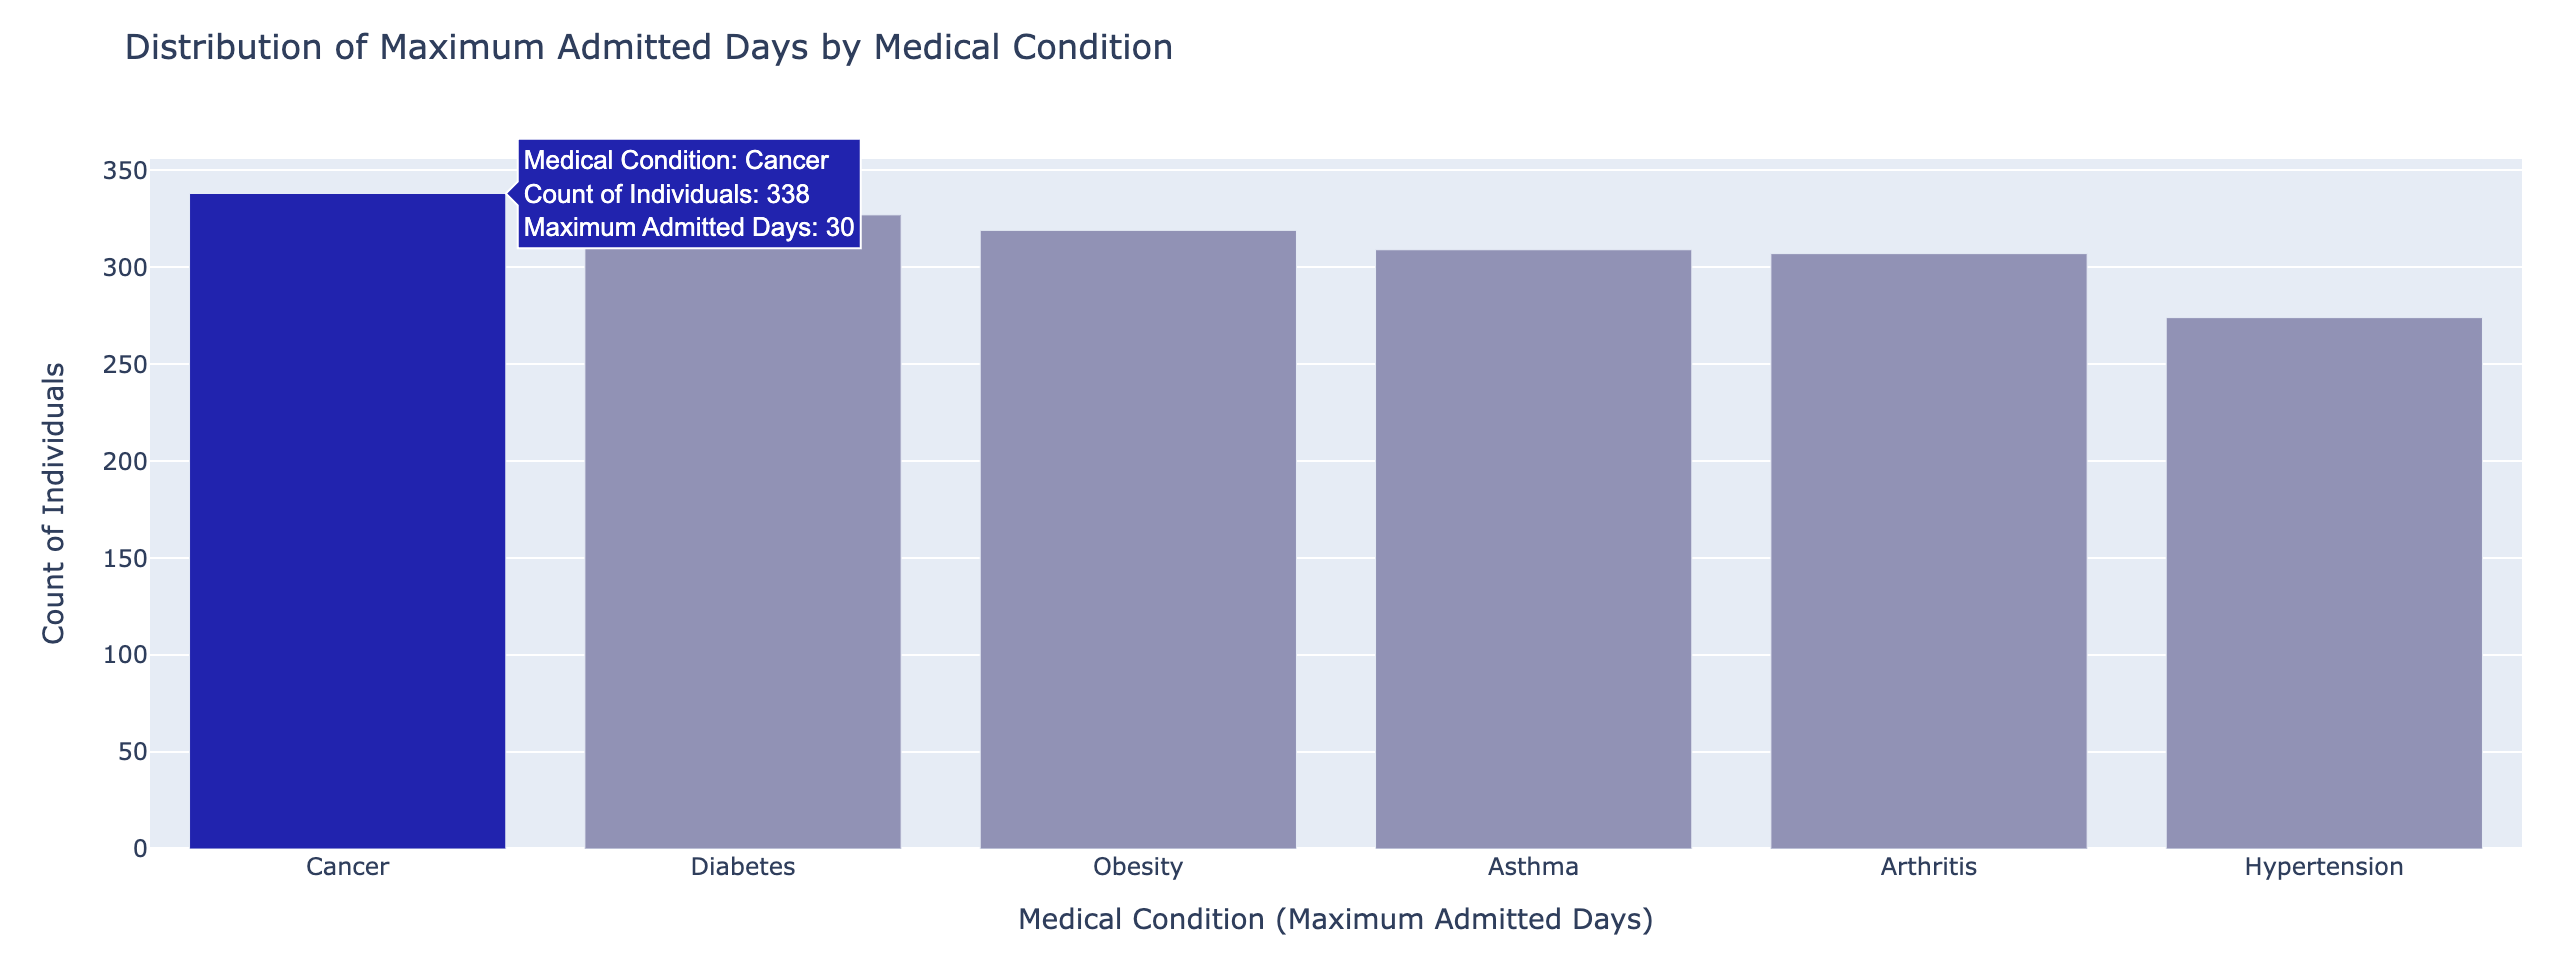

In [66]:
from PIL import Image
from IPython.display import display

image_path = '/kaggle/input/this-project-viz/s4.png'

img = Image.open(image_path)
display(img)

<div style='text-align:center;font-size:20px'>
 Age, Admission Type and Test Results
</div>

In [67]:
age_test = df.loc[:,['Age','Admission Type','Test Results']]
age_test

,Age,Admission Type,Test Results
0,30,Urgent,Normal
1,62,Emergency,Inconclusive
2,76,Emergency,Normal
3,28,Elective,Abnormal
4,43,Urgent,Abnormal
...,...,...,...
55495,42,Elective,Abnormal
55496,61,Elective,Normal
55497,38,Urgent,Abnormal
55498,43,Elective,Abnormal


In [68]:
age_test_plot=px.box(age_test,x='Admission Type',y='Age',color='Test Results',title='Age, Admission Type and Test Results')
age_test_plot.show()

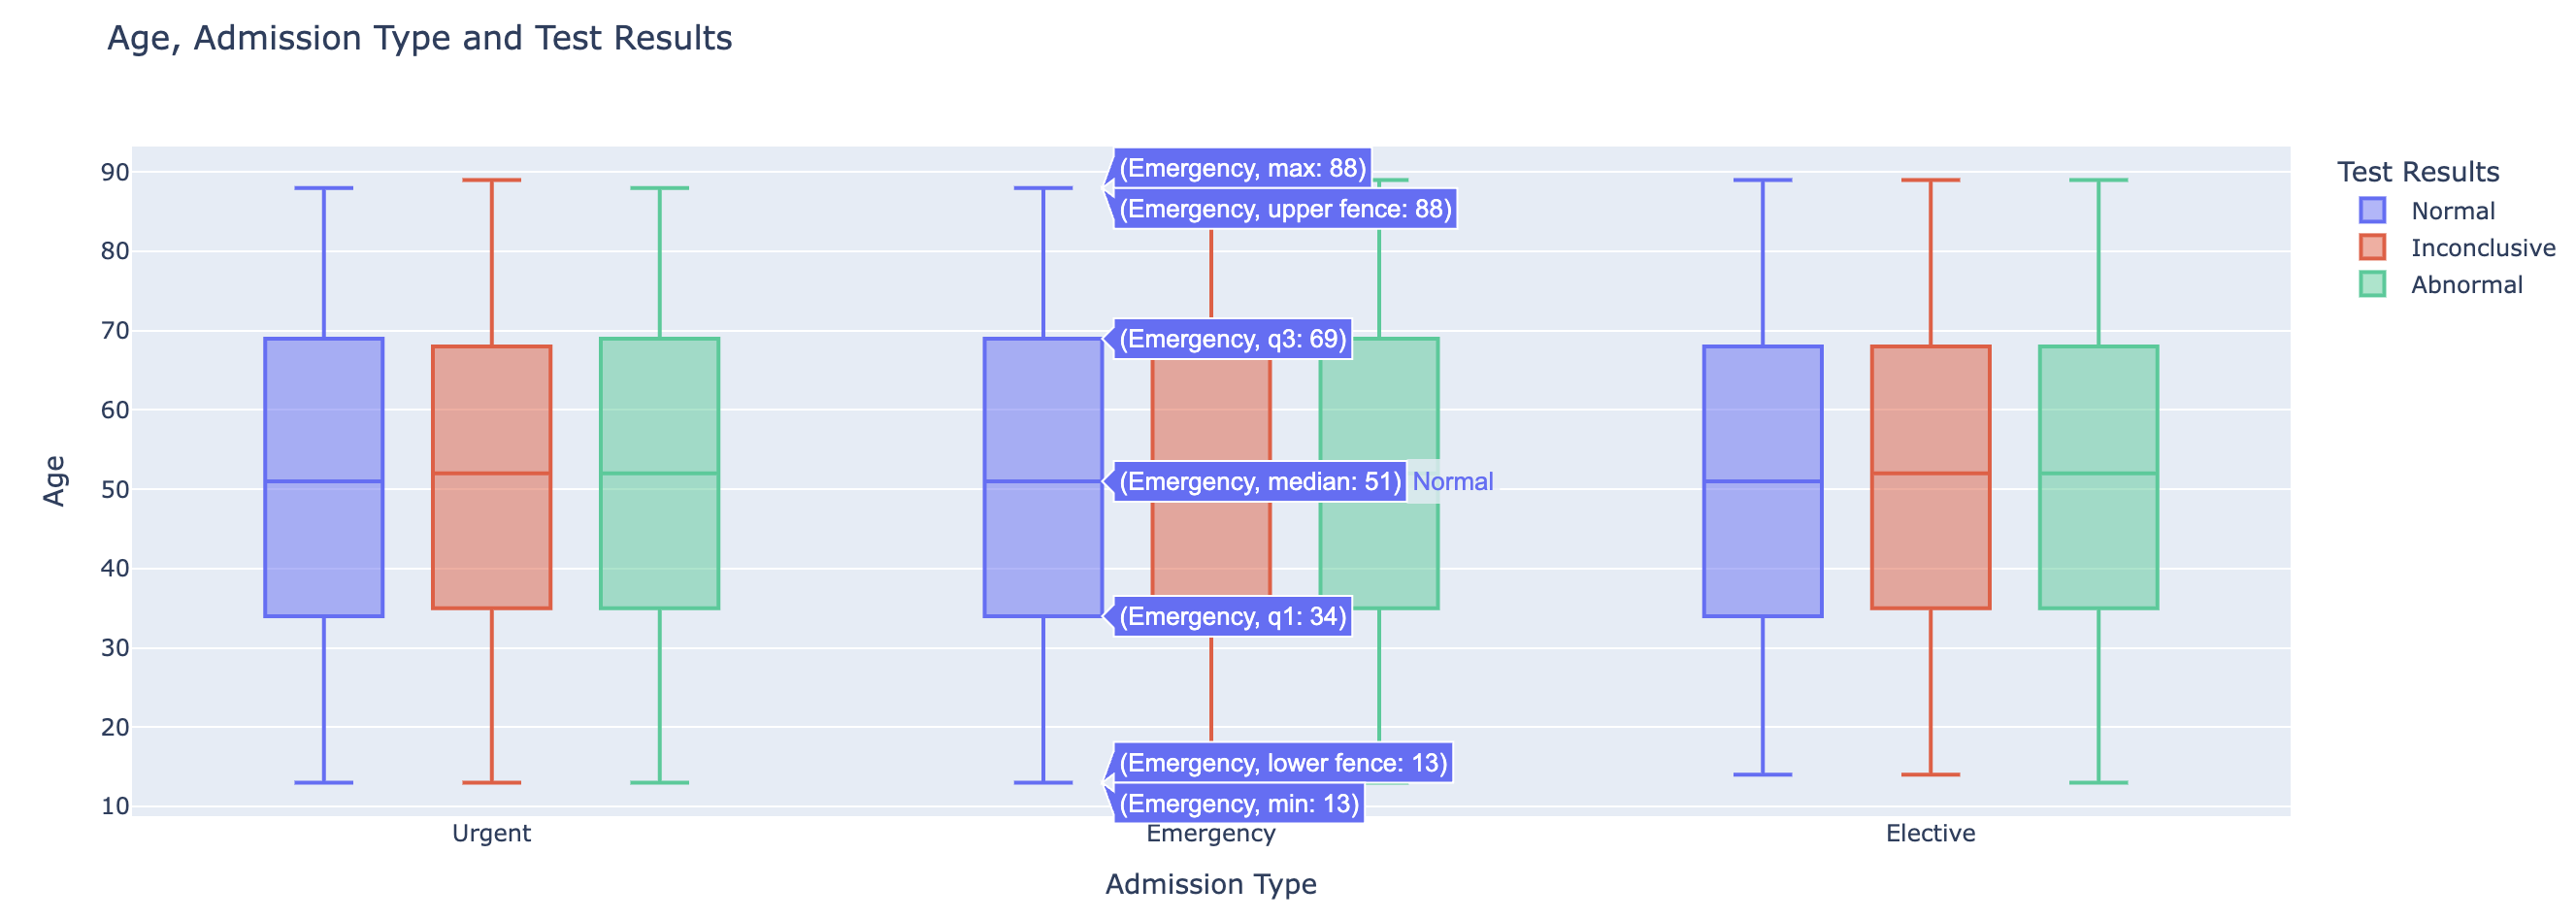

In [69]:
from PIL import Image
from IPython.display import display

image_path = '/kaggle/input/this-project-viz/s5.png'

img = Image.open(image_path)
display(img)

<div style='text-align:center;font-size:20px'>
   Medical Condition vs Billing Amount
</div>

In [70]:
med_bill = df.loc[:,['Medical Condition','Billing Amount']]
med_bill['Billing Amount'] = med_bill['Billing Amount'].astype(int)
med_bill

,Medical Condition,Billing Amount
0,Cancer,18856
1,Obesity,33643
2,Obesity,27955
3,Diabetes,37909
4,Cancer,14238
...,...,...
55495,Asthma,2650
55496,Obesity,31457
55497,Hypertension,27620
55498,Arthritis,32451


In [71]:
med_bill['Billing Amount'].describe()

count    55500.000000
mean     25538.818613
std      14211.448952
min      -2008.000000
25%      13240.750000
50%      25537.500000
75%      37820.000000
max      52764.000000
Name: Billing Amount, dtype: float64

<div style='text-align:left;font-size:20px'>
    
**We see a negative Billing Amount, which is interesting!**


*Overpayment*: A negative balance may occur when a patient or insurance company overpays. This could happen due to duplicate payments, incorrect billing, or adjustments after insurance coverage is finalized. In such cases, the negative amount reflects that a refund is owed to the payer or that the excess will be applied to future charges.
<br>

*Negative Reimbursement*: In healthcare billing, negative reimbursement can occur when the patient's cost-sharing (e.g., deductible or coinsurance) exceeds the amount reimbursed by Medicare or other insurers. For example, if the deductible surpasses the payment for a service, the reimbursement may show as a negative number on the claim.
<br>

*Adjustments or Write-Offs*: Negative adjustments can result from corrections to previous billing errors, retroactive changes in insurance coverage, or contract rate discrepancies. These adjustments may appear as negative balances on financial reports.
<br>

*Claim Reversals*: If a claim is retracted due to errors like payment to the wrong provider or member, it may create a negative balance until resolved through offsets or refunds
</div>

In [72]:
min_med_bill = df.loc[df['Billing Amount']<0,['Hospital','Insurance Provider','Medical Condition','Test Results','Billing Amount']]
min_med_bill

,Hospital,Insurance Provider,Medical Condition,Test Results,Billing Amount
132,"and Johnson Moore, Branch",Aetna,Cancer,Normal,-502.507813
799,Hunter-Hughes,Aetna,Asthma,Inconclusive,-1018.245371
1018,"and Wagner, Lee Klein",Aetna,Hypertension,Normal,-306.364925
1421,Group Peters,Blue Cross,Asthma,Abnormal,-109.097122
2103,"and Huff Reeves, Dennis",Blue Cross,Diabetes,Abnormal,-576.727907
...,...,...,...,...,...
52894,Inc Ward,Blue Cross,Diabetes,Inconclusive,-353.865186
53204,"and Wagner, Lee Klein",Aetna,Hypertension,Normal,-306.364925
53232,Carr Ltd,Aetna,Hypertension,Abnormal,-591.917419
54136,"Mcconnell and Rios, Clark",UnitedHealthcare,Cancer,Abnormal,-199.663795


<div style='text-align:center;font-size:20px'>
   Number of Insurance Companies with Negative Charges
</div>

In [73]:
ins_count = df.loc[df['Billing Amount']<0,['Insurance Provider']].groupby(['Insurance Provider']).size().reset_index(name='Count of Individuals')\
                 .sort_values(by=['Count of Individuals'], ascending=False).reset_index(drop=True)
ins_count

,Insurance Provider,Count of Individuals
0,Aetna,27
1,Cigna,24
2,Medicare,22
3,UnitedHealthcare,19
4,Blue Cross,16


In [74]:
ins_count_plot = px.pie(ins_count,values='Count of Individuals',names='Insurance Provider',color='Insurance Provider',title='Number of Insurance Companies with Negative Charges')
ins_count_plot.show()

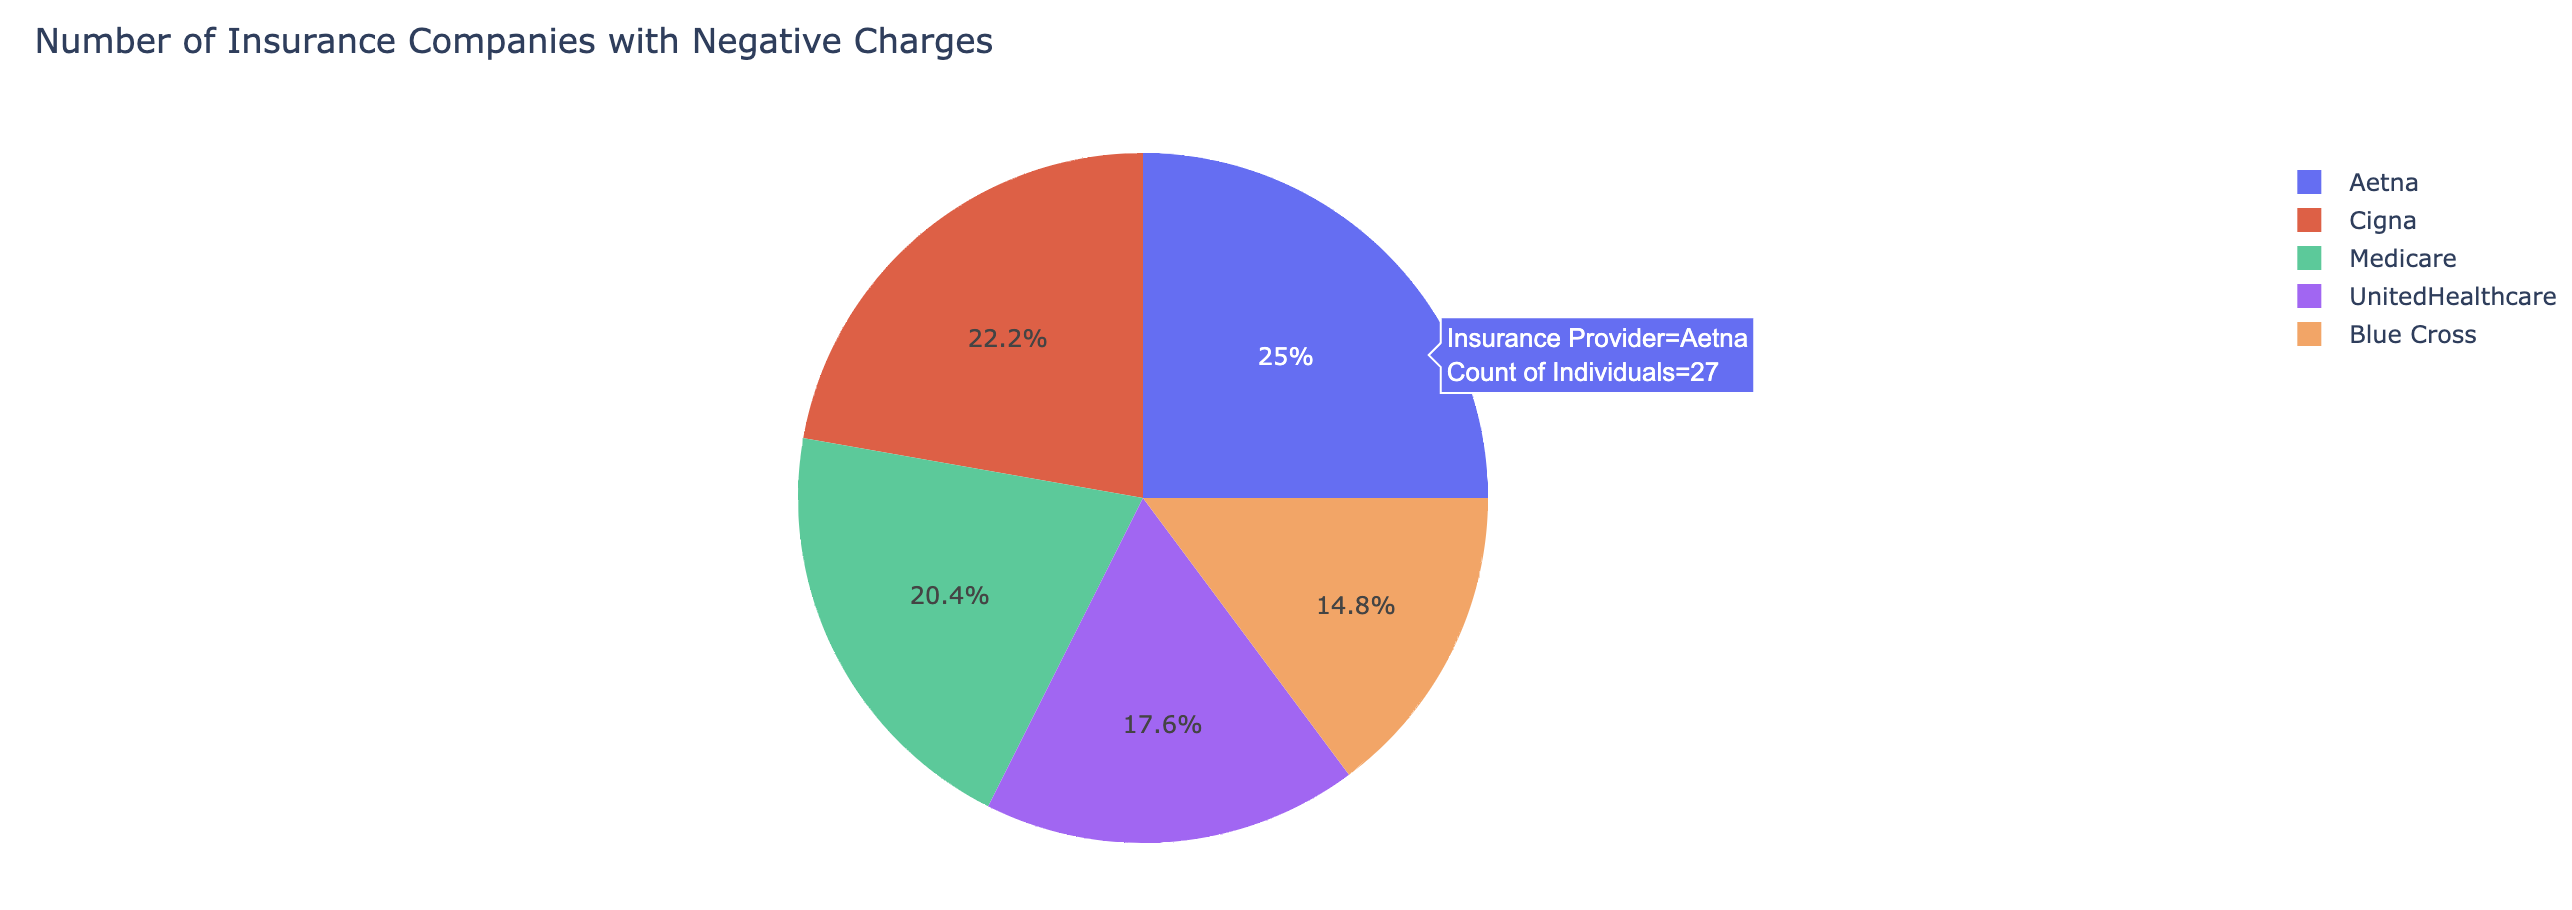

In [75]:
from PIL import Image
from IPython.display import display

image_path = '/kaggle/input/this-project-viz/s6.png'

img = Image.open(image_path)
display(img)